# Example Data Generator
This notebook creates virtual data for an example patient to test
and demonstrate the model code. We do not claim this to be a representation
of a real patient.

In [ ]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mech_models.tox_models import pred_fri

# Generate virtual patient data via Friberg model

In [2]:
# average population parameters
p0fri = np.array([0.316, 195, 2., 270.]) # (gamma, MTT in h, slope, c0 in cells/(l * 10^9))
# generic treatment
therapy = (np.arange(0,6)*21, np.ones(6))    # (days, dosage)
t_fri = np.arange(0, 6*21, 1)     # days to generate measurements

In [3]:
# generate population friberg solution
y_fri = pred_fri(p0fri, t_fri, therapy)

In [4]:
# add noise to virtual measurements, downsample to every 4th measurement to
# simulate sparsity
noise = 0.1
rng = np.random.default_rng(seed=0)
noise_std = y_fri * noise
noise_add = np.array([rng.normal(0, noise_std[j], 1) for j in range(len(y_fri))]).flatten()
y_arr = np.floor((y_fri + noise_add)[::4] /1e9)
t_arr = t_fri[::4]

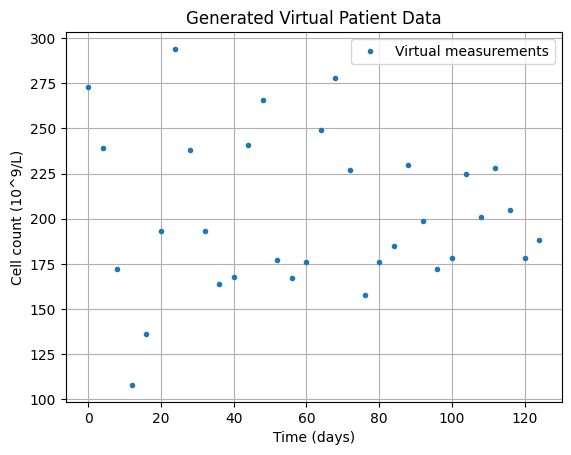

In [5]:
# Examine generated data
plt.plot(t_arr, y_arr, ls='', marker='.', label='Virtual measurements')
plt.xlabel('Time (days)')
plt.ylabel('Cell count (10^9/L)')
plt.title('Generated Virtual Patient Data')
plt.grid(True)
plt.legend()
plt.grid(True)

# Save generated Data

In [6]:
# Create output directory if it does not exist
os.makedirs('data_example', exist_ok=True)

In [7]:
cycles = np.floor(t_arr/21) + 1

In [8]:
# virtual measurements as pandas dataframe
dfp = pd.DataFrame(data={'ID': 0, 'TIME': t_arr, 'Y': y_arr, "CYCLE": cycles})
# treatment as pandas dataframe
dft = pd.DataFrame(data={'ID': 0, 'TIME': therapy[0], 'DOSE_ST': therapy[1]})

In [9]:
dfp.to_csv('data_example/example_platelets.csv', index=False)
dft.to_csv('data_example/example_treatment.csv', index=False)

# Fit models to generated data for different data availability scenarios

In [9]:
for a in range(0,6):
    !python mech_models/tox_models_pop.py --arr {a} --run_dir {"data_example"}